## Datos

In [ ]:
## Load libraries
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os
from sklearn.metrics import mean_absolute_error, r2_score
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.float_format', '{:.0f}'.format)

In [ ]:
# Data transaccional
transaccional = "../data/X
fatura = pd.read_csv(transaccional, encoding="ISO-8859-1", delimiter=";")
transaccional2 = "../data/X
leitura = pd.read_csv(transaccional2, encoding="ISO-8859-1", delimiter=";")
archivo = "../data/X
reformas = pd.read_csv(archivo, delimiter=";", on_bad_lines="skip")  # Si usa punto y coma

/var/folders/6t/wsvrnby90bjc6357kyzjpp5mvbl7g2/T/ipykernel_42339/1189159684.py:3: DtypeWarning: Columns (4,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  fatura = pd.read_csv(transaccional, encoding="ISO-8859-1", delimiter=";")
/var/folders/6t/wsvrnby90bjc6357kyzjpp5mvbl7g2/T/ipykernel_42339/1189159684.py:5: DtypeWarning: Columns (5,11,13,18,19,20,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  leitura = pd.read_csv(transaccional2, encoding="ISO-8859-1", delimiter=";")
/var/folders/6t/wsvrnby90bjc6357kyzjpp5mvbl7g2/T/ipykernel_42339/1189159684.py:7: DtypeWarning: Columns (1,14,21,30,31,44,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  reformas = pd.read_csv(archivo, delimiter=";", on_bad_lines="skip")  # Si usa punto y coma


In [ ]:
fatura['ID_FORNECIMENTO'].nunique()

50530

In [ ]:
reformas['reformo'] = 1
#reformas = reformas[reformas['DATA_FIM_PROCESSO'] <= '2024-12-31']

In [ ]:
merged_df = fatura.merge(leitura, on="ID_FATURA", how="outer", indicator=True)
df = merged_df.copy()
df

UK_MOV_FATURA                    ID_FATURA     CD_FATURA  ANO_FATURA  \
0              3583240  199662010044812810022199609 6201004481281        1996   
1              3398094  199662020044812810022199610 6202004481281        1996   
2              3398095  199662030044812810022199611 6203004481281        1996   
3              3819040  199662040044812810022199612 6204004481281        1996   
4              3610026  199762050044812810022199701 6205004481281        1997   
...                ...                          ...           ...         ...   
2333445      734796570     20259988318SOR0449202501       9988318        2025   
2333446      734788300       20259988327SOR04202501       9988327        2025   
2333447      734790179     20259988396SOR0259202501       9988396        2025   
2333448      734726309     20259994887SOR0258202501       9994887        2025   
2333449      734774667    20259995155SOR02794202501       9995155        2025   

        CD_SECCIONAL  CD_SEGMENTO  ID_FORNECIMENTO  ID_SUJEITO  CD_ATC  \
0                  0            0      44812833001      409850     581   
1                  0            0      44812833001      409850     581   
2                  0            0      44812833001      409850     581   
3                  0            0      44812833001      409850     581   
4                  0            0      44812833001      409850     581   
...              ...          ...              ...         ...     ...   
2333445          SOR            0     606243968001      415597     581   
2333446          SOR            0   86040572341102  1957094154     581   
2333447          SOR            0   86040746682535      456968     581   
2333448          SOR            0     940500825002      439170     581   
2333449          SOR            0      44222017002      441415     581   

        CD_GR_FATURAMENTO        ST_FATURA    TP_FATURA TP_DOCUMENTO_LOGICO  \
0                F_COM_10  CONTABEFFETTIVO  FATURAMENTO                   B   
1                F_COM_10  CONTABEFFETTIVO  FATURAMENTO                   B   
2                F_COM_10  CONTABEFFETTIVO  FATURAMENTO                   B   
3                F_COM_10  CONTABEFFETTIVO  FATURAMENTO                   B   
4                F_COM_10  CONTABEFFETTIVO  FATURAMENTO                   B   
...                   ...              ...          ...                 ...   
2333445          F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
2333446          F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
2333447          F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
2333448          F_COM_11  CONTABEFFETTIVO  FATURAMENTO                   B   
2333449          F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   

        DT_EMISSAO_FATURA VLR_FATURADO_TOTAL QTD_CONSUMO_FATURADO_AGUA  \
0                16/09/96            1323,36                         0   
1                21/10/96            2600,09                         0   
2                19/11/96            1430,11                         0   
3                17/12/96            1639,34                         0   
4                20/01/97            3398,58                         0   
...                   ...                ...                       ...   
2333445          30/01/25              31,78                      8,66   
2333446          30/01/25              13,54                         8   
2333447          30/01/25              70,93                         8   
2333448          30/01/25              48,77                         6   
2333449          30/01/25              64,68                      6,33   

        QTD_CONSUMO_FATURADO_ESGOTO QTD_CONSUMO_FATURADO_END  CH_DOCUMENTO  \
0                                 0                        0            22   
1                                 0                        0            22   
2                                 0                        0            22 

In [ ]:
ids_reforma = reformas['FORNECIMENTO'].unique()
df_filtrado = df[df['ID_FORNECIMENTO'].isin(ids_reforma)]

In [ ]:
df_filtrado = df.copy()
# Cuántos clientes únicos hay en reformas
n_reformas = reformas['FORNECIMENTO'].nunique()

# Cuántos clientes únicos hay en df_filtrado
n_df_filtrado = df_filtrado['ID_FORNECIMENTO'].nunique()
# Clientes únicos totales en df
total_clientes_df = df['ID_FORNECIMENTO'].nunique()


print(f"Clientes únicos en reformas: {n_reformas}")
print(f"Clientes únicos en df_filtrado: {n_df_filtrado}")
print(f"Total clientes: {total_clientes_df}")

Clientes únicos en reformas: 473755
Clientes únicos en df_filtrado: 50530
Total clientes: 50530


In [ ]:
df = df_filtrado.copy()
df['AAMM_COMPETENCIA'] = pd.to_numeric(df['AAMM_COMPETENCIA'], errors='coerce')
df['QTD_CONSUMO_MEDIDO_AGUA'] = df['QTD_CONSUMO_MEDIDO_AGUA'].astype(str).str.replace(',', '.')
df['QTD_CONSUMO_MEDIDO_AGUA'] = pd.to_numeric(df['QTD_CONSUMO_MEDIDO_AGUA'], errors='coerce')

df['VLR_FATURADO_TOTAL'] = df['VLR_FATURADO_TOTAL'].astype(str).str.replace(',', '.')
df['VLR_FATURADO_TOTAL'] = pd.to_numeric(df['VLR_FATURADO_TOTAL'], errors='coerce')

df['QTD_CONSUMO_FATURADO_AGUA'] = df['QTD_CONSUMO_FATURADO_AGUA'].astype(str).str.replace(',', '.')
df['QTD_CONSUMO_FATURADO_AGUA'] = pd.to_numeric(df['QTD_CONSUMO_FATURADO_AGUA'], errors='coerce')

df['CONSUMO_MEDIO'] = df['CONSUMO_MEDIO'].astype(str).str.replace(',', '.')
df['CONSUMO_MEDIO'] = pd.to_numeric(df['CONSUMO_MEDIO'], errors='coerce')
#Create data column
# Asegurarse de que la columna existe y convertir a string
df['AAMM_COMPETENCIA'] = df['AAMM_COMPETENCIA'].astype(str)

# Reemplazar valores inválidos como 'nan', 'NaT', etc. por NaN
df['AAMM_COMPETENCIA'] = df['AAMM_COMPETENCIA'].replace('nan', pd.NA)

# Eliminar filas con AAMM_COMPETENCIA nulo o inválido (opcional)
df = df[df['AAMM_COMPETENCIA'].notna()]

# Extraer año y mes
df['ANO'] = df['AAMM_COMPETENCIA'].str[:4].astype(int)
df['MES'] = df['AAMM_COMPETENCIA'].str[4:6].astype(int)

# Crear columna combinada y objeto tipo fecha
df['ANO_MES'] = df['ANO'].astype(str) + '-' + df['MES'].astype(str).str.zfill(2)
df['DATA'] = pd.to_datetime(df['ANO_MES'], format='%Y-%m', errors='coerce')

In [ ]:
#Filtros
df_2 = df[(df['ANO'] >= 2021) & (df['ANO'] <= 2024)]
#Filtros que tenemos que confirmar para entender como hacerlo correctamente
df_3 = df_2[df_2['VLR_FATURADO_TOTAL'] > 0]
df_filtrado = df_3[df_3['TP_LEITURA_LOGICO'].isin(['LG', 'LR', 'MA'])]
df_filtrado = df_filtrado[df_filtrado['ST_FATURA'] != 'ANNULLATO']

df = df_filtrado.copy()

In [ ]:
# Cuántos clientes únicos hay en reformas
n_reformas = reformas['FORNECIMENTO'].nunique()

# Cuántos clientes únicos hay en df_filtrado
n_df_filtrado = df_filtrado['ID_FORNECIMENTO'].nunique()
# Clientes únicos totales en df
total_clientes_df = df['ID_FORNECIMENTO'].nunique()


print(f"Clientes únicos en reformas: {n_reformas}")
print(f"Clientes únicos en df_filtrado: {n_df_filtrado}")
print(f"Total clientes: {total_clientes_df}")

Clientes únicos en reformas: 473755
Clientes únicos en df_filtrado: 44419
Total clientes: 44419


In [ ]:
merge_reforma_df = df.merge(
    reformas,
    left_on="ID_FATURA",
    right_on="DOCUMENTO",
    how="left",
    indicator=False
)

In [ ]:
merge_reforma_df['reformo'] = merge_reforma_df['reformo'].fillna(0)
merge_reforma_df.head()

UK_MOV_FATURA                   ID_FATURA  CD_FATURA  ANO_FATURA  \
0       39481438  202110064154SOR02792202106   10064154        2021   
1      420506786   202110064155SOR0449202106   10064155        2021   
2       39481440   202110064156SOR0449202106   10064156        2021   
3       39481441     202110064157SOR08202106   10064157        2021   
4       39481442  202110064158SOR02792202106   10064158        2021   

  CD_SECCIONAL  CD_SEGMENTO  ID_FORNECIMENTO  ID_SUJEITO  CD_ATC  \
0          SOR            0   86040363137562      411822     581   
1          SOR            0   86040363457460      415729     581   
2          SOR            0   86040364256601      421555     581   
3          SOR            0   86040365099487  1955188275     581   
4          SOR            0   86040365888625      410260     581   

  CD_GR_FATURAMENTO        ST_FATURA    TP_FATURA TP_DOCUMENTO_LOGICO  \
0          F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
1          F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
2          F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
3          F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
4          F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   

  DT_EMISSAO_FATURA  VLR_FATURADO_TOTAL  QTD_CONSUMO_FATURADO_AGUA  \
0          21/06/21                  86                         13   
1          21/06/21                  31                         10   
2          21/06/21                 396                         31   
3          21/06/21                2614                        120   
4          21/06/21                 384                         10   

  QTD_CONSUMO_FATURADO_ESGOTO QTD_CONSUMO_FATURADO_END  CH_DOCUMENTO  \
0                          13                        0          2792   
1                           0                        0           449   
2                          31                        0           449   
3                         120                        0             8   
4                          10                        0          2792   

  AAMM_COMPETENCIA DT_INCLUSAO_x DT_INSERCAO_x                   ID_LEITURA  \
0         202106.0      17/07/21           NaN  vt9EiLU2E3Dd78Jr-508-202106   
1         202106.0      23/09/23           NaN       00B6D70000b-535-202106   
2         202106.0      17/07/21           NaN  WS32Fo7QVrRHiMZM-519-202106   
3         202106.0      17/07/21           NaN       00B6DA0008d-590-202106   
4         202106.0      17/07/21           NaN       00B7620014d-475-202106   

      ID_PDE ID_HIDROMETRO_LEITURA CD_GR_LEITURA CD_OPERADOR ST_LEITURA  \
0 2000005617            Y20T471567       L_COMUM         NaN        FAT   
1  467221570            Y13L688021       L_COMUM         NaN        FAT   
2 2000008138            A19L693761       L_COMUM         NaN        FAT   
3   45149984            Y12L203914       L_COMUM         NaN        FAT   
4   45298394            Y20T497434       L_COMUM         NaN        FAT   

  TP_LEITURA_LOGICO  CD_NAO_LEITURA  CD_ORIGEM_LEITURA  NR_TAREFA  \
0                MA              -1                  4        NaN   
1                LG              -1                 -1        NaN   
2                MA              -1                  4        NaN   
3                LG              -1                 -1        NaN   
4                LG              26                 -1        NaN   

  NR_LEITURA_ATUAL DH_LEITURA_ATUAL NR_LEITURA_ANTERIOR DH_LEITURA_ANTERIOR  \
0               85         07/06/21                  72            07/05/21   
1              487         07/06/21                 497            07/04/21   
2               83         07/06/21                  52            07/05/21   
3             8580         07/06/21                8371            07/04/21   
4               10         07/06/21                  28            10/05/21   

   QTD_DIAS  DS_OBS_GERAL FL_ALTA_BAIXA_CONSUMO  QTD_CONSU

In [ ]:
df_media = merge_reforma_df.copy()

In [ ]:
df_media.columns = df_media.columns.str.lower()

In [ ]:
df_media

uk_mov_fatura                   id_fatura  cd_fatura  ano_fatura  \
0             39481438  202110064154SOR02792202106   10064154        2021   
1            420506786   202110064155SOR0449202106   10064155        2021   
2             39481440   202110064156SOR0449202106   10064156        2021   
3             39481441     202110064157SOR08202106   10064157        2021   
4             39481442  202110064158SOR02792202106   10064158        2021   
...                ...                         ...        ...         ...   
1569113      695503533    2025919471SOR01612202412     919471        2025   
1569114      695516693    2025919472SOR01611202412     919472        2025   
1569115      695451721    2025919473SOR01612202412     919473        2025   
1569116      695471791    2025919474SOR01612202412     919474        2025   
1569117      695490488    2025919529SOR01612202412     919529        2025   

        cd_seccional  cd_segmento  id_fornecimento  id_sujeito  cd_atc  \
0                SOR            0   86040363137562      411822     581   
1                SOR            0   86040363457460      415729     581   
2                SOR            0   86040364256601      421555     581   
3                SOR            0   86040365099487  1955188275     581   
4                SOR            0   86040365888625      410260     581   
...              ...          ...              ...         ...     ...   
1569113          SOR            0     598322230002      436872     581   
1569114          SOR            0     744302030001      409311     581   
1569115          SOR            0     755927974002      435072     581   
1569116          SOR            0     811735397006      434104     581   
1569117          SOR            0     941491943001      436651     581   

        cd_gr_faturamento        st_fatura    tp_fatura tp_documento_logico  \
0                F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
1                F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
2                F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
3                F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
4                F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
...                   ...              ...          ...                 ...   
1569113          F_COM_14  CONTABEFFETTIVO  FATURAMENTO                   B   
1569114          F_COM_14  CONTABEFFETTIVO  FATURAMENTO                   B   
1569115          F_COM_14  CONTABEFFETTIVO  FATURAMENTO                   B   
1569116          F_COM_14  CONTABEFFETTIVO  FATURAMENTO                   B   
1569117          F_COM_14  CONTABEFFETTIVO  FATURAMENTO                   B   

        dt_emissao_fatura  vlr_faturado_total  qtd_consumo_faturado_agua  \
0                21/06/21                  86                         13   
1                21/06/21                  31                         10   
2                21/06/21                 396                         31   
3                21/06/21                2614                        120   
4                21/06/21                 384                         10   
...                   ...                 ...                        ...   
1569113          02/01/25                 575                         32   
1569114          02/01/25                 778                         39   
1569115          02/01/25                1483                        103   
1569116          02/01/25                4212                         83   
1569117          02/01/25                 892                         68   

        qtd_consumo_faturado_esgoto qtd_consumo_faturado_end  ch_documento  \
0                                13                        0          2792   
1                                 0                        0           449   
2                                31                        0           449   
3                    

## Functions

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def detectar_outliers_isolation_forest(
    df,
    col_consumo="qtd_consumo_medido_agua",
    n_estimators=100,
    contamination=0.05,
    random_state=42
):
    df = df.copy()
    resultados = []

    for cliente_id, grupo in df.groupby("id_fornecimento"):
        grupo = grupo.copy().sort_values("data")

        # Si hay pocos datos, no evaluamos
        if grupo.shape[0] < 12:
            grupo["score_if"] = np.nan
            grupo["outlier_if"] = False
            resultados.append(grupo)
            continue

        X = grupo[[col_consumo]].values

        model = IsolationForest(
            n_estimators=n_estimators,
            contamination=contamination,
            random_state=random_state
        )

        model.fit(X)

        grupo["score_if"] = model.decision_function(X)
        grupo["outlier_if"] = model.predict(X) == -1  # -1 es outlier

        resultados.append(grupo)

    return pd.concat(resultados, ignore_index=True)

def resumen_outliers_reformas(df, col_outlier="outlier_if", col_reforma="reformo"):
    df = df.copy()

    total_outliers = df[df[col_outlier] == True].shape[0]
    total_reformas = df[df[col_reforma] == 1].shape[0]

    reformas_detectadas = df[(df[col_outlier] == True) & (df[col_reforma] == 1)].shape[0]
    reformas_no_detectadas = total_reformas - reformas_detectadas

    outliers_reforma = reformas_detectadas
    outliers_no_reforma = total_outliers - reformas_detectadas

    # Evitar divisiones por cero
    pct_reformas_detectadas = reformas_detectadas / total_reformas if total_reformas > 0 else None
    pct_reformas_no_detectadas = reformas_no_detectadas / total_reformas if total_reformas > 0 else None

    pct_outliers_reforma = outliers_reforma / total_outliers if total_outliers > 0 else None
    pct_outliers_no_reforma = outliers_no_reforma / total_outliers if total_outliers > 0 else None

    resumen = {
        "Total Outliers Detectados": total_outliers,
        "Total Reformas": total_reformas,

        # Reformas -> Outliers
        "# Reformas que son outliers": reformas_detectadas,
        "# Reformas que NO son outliers": reformas_no_detectadas,
        "% Reformas que son outlier": round(pct_reformas_detectadas * 100, 2) if pct_reformas_detectadas is not None else None,
        "% Reformas que no son outlier": round(pct_reformas_no_detectadas * 100, 2) if pct_reformas_no_detectadas is not None else None,
    }

    return pd.DataFrame([resumen])

import matplotlib.pyplot as plt

def graficar_outliers_isolation_forest(df, cliente_id, col_consumo="qtd_consumo_medido_agua"):
    df_cliente = df[df["id_fornecimento"] == cliente_id].copy().sort_values("data")

    plt.figure(figsize=(14, 5))
    
    # Línea de consumo
    plt.plot(df_cliente["data"], df_cliente[col_consumo], label="Consumo", color="blue", marker='o', zorder=1)

    # Outliers detectados
    outliers = df_cliente[df_cliente["outlier_if"] == True]
    plt.scatter(outliers["data"], outliers[col_consumo], color="red", label="Outliers (Isolation Forest)", zorder=2)

    # Si hay flag_reforma, también se puede mostrar
    if "reformo" in df_cliente.columns:
        reformas = df_cliente[df_cliente["reformo"] == 1]
        plt.scatter(reformas["data"], reformas[col_consumo], color="black", label="Reclamos (reformo)", marker="x", s=100, zorder=3)

    plt.title(f"Consumo mensual y Outliers - Cliente {cliente_id}")
    plt.xlabel("Fecha")
    plt.ylabel("Consumo (m³)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def detectar_outliers_lof(
    df,
    col_consumo="qtd_consumo_medido_agua",
    n_neighbors=5,  # cuantos vecinos se consideran
    contamination=0.05
):
    df = df.copy()
    resultados = []

    for cliente_id, grupo in df.groupby("id_fornecimento"):
        grupo = grupo.copy().sort_values("data")

        if grupo.shape[0] < n_neighbors + 1:
            grupo["score_lof"] = np.nan
            grupo["outlier_lof"] = False
            resultados.append(grupo)
            continue

        X = grupo[[col_consumo]].values

        lof = LocalOutlierFactor(
            n_neighbors=n_neighbors,
            contamination=contamination,
            novelty=False  # estamos usando fit_predict
        )

        y_pred = lof.fit_predict(X)  # -1 es outlier
        scores = lof.negative_outlier_factor_  # cuanto más bajo, más "anómalo"

        grupo["score_lof"] = scores
        grupo["outlier_lof"] = y_pred == -1

        resultados.append(grupo)

    return pd.concat(resultados, ignore_index=True)

def evaluar_modelo_outliers(
    df,
    modelo_id="Modelo_X",
    col_outlier="outlier_x",
    col_consumo="qtd_consumo_medido_agua",
    col_reforma="reformo",
    col_residuo=None  # Solo se usa si el modelo tiene residuo (ej. MM)
):
    df = df.copy()
    clientes_procesados = df["id_fornecimento"].nunique()
    total_outliers = df[df[col_outlier] == 1].shape[0]
    total_reformas = df[df[col_reforma] == 1].shape[0]

    reformas_outliers = df[(df[col_outlier] == 1) & (df[col_reforma] == 1)].shape[0]
    reformas_no_outliers = total_reformas - reformas_outliers

    outliers_reformas = reformas_outliers
    outliers_no_reformas = total_outliers - reformas_outliers

    # ==== Positivos y negativos ====
    if col_residuo:  # modelos como MM que tienen columna de residuo explícita
        outliers_pos = df[(df[col_outlier] == 1) & (df[col_residuo] > 0)].shape[0]
        outliers_neg = df[(df[col_outlier] == 1) & (df[col_residuo] < 0)].shape[0]
    else:  # modelos como IF o LOF
        df["media_cliente"] = df.groupby("id_fornecimento")[col_consumo].transform("mean")
        df["pseudo_residuo"] = df[col_consumo] - df["media_cliente"]
        outliers_pos = df[(df[col_outlier] == 1) & (df["pseudo_residuo"] > 0)].shape[0]
        outliers_neg = df[(df[col_outlier] == 1) & (df["pseudo_residuo"] < 0)].shape[0]

    # ==== Porcentajes ====
    pct_reformas_outliers = reformas_outliers / total_reformas if total_reformas > 0 else None
    pct_reformas_no_outliers = reformas_no_outliers / total_reformas if total_reformas > 0 else None

    pct_outliers_reformas = outliers_reformas / total_outliers if total_outliers > 0 else None
    pct_outliers_no_reformas = outliers_no_reformas / total_outliers if total_outliers > 0 else None

    resumen = {
        "modelo_id": modelo_id,
        "Clientes_Procesados": clientes_procesados,
        "Total_Outliers": total_outliers,
        "Reformas_Total": total_reformas,
        "Reformas_Outliers": reformas_outliers,
        "Reformas_No_Outliers": reformas_no_outliers,
        "%_Reformas_Outliers": round(pct_reformas_outliers * 100, 2) if pct_reformas_outliers is not None else None,
        "%_Reformas_No_Outliers": round(pct_reformas_no_outliers * 100, 2) if pct_reformas_no_outliers is not None else None,
        "Outliers_Reformas": outliers_reformas,
        "Outliers_No_Reformas": outliers_no_reformas,
        "%_Outliers_Reformas": round(pct_outliers_reformas * 100, 2) if pct_outliers_reformas is not None else None,
        "%_Outliers_No_Reformas": round(pct_outliers_no_reformas * 100, 2) if pct_outliers_no_reformas is not None else None,
        "Outliers_Positivos": outliers_pos,
        "Outliers_Negativos": outliers_neg
    }

    return pd.DataFrame([resumen])


# === 1. Remover outliers IQR inicial por cliente ===
def remover_outliers_iqr_por_cliente(df, col_consumo="qtd_consumo_medido_agua"):
    resultados = []
    for cliente_id, grupo in df.groupby("id_fornecimento"):
        grupo = grupo.copy()
        q1 = grupo[col_consumo].quantile(0.15)
        q3 = grupo[col_consumo].quantile(0.85)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        grupo_filtrado = grupo[(grupo[col_consumo] >= lim_inf) & (grupo[col_consumo] <= lim_sup)].copy()
        resultados.append(grupo_filtrado)
    return pd.concat(resultados, ignore_index=True)

# === 2. Calcular media móvil (solo en datos filtrados) ===
def calcular_media_movel(df_filtrado, window=3, col_consumo="qtd_consumo_medido_agua"):
    df_filtrado = df_filtrado.sort_values(["id_fornecimento", "data"])
    df_filtrado[f"media_movel_{window}"] = (
        df_filtrado.groupby("id_fornecimento")[col_consumo]
        .transform(lambda x: x.rolling(window=window, center=False).mean())
    )
    return df_filtrado

def aplicar_media_movel_en_original(df_original, df_com_media, window=3):
    """
    Asigna la media móvil calculada (con datos filtrados) al DataFrame original usando merge.
    Si hay NaN (porque fue un punto eliminado en IQR inicial), se completa con el último valor válido anterior.
    """
    col_media = f"media_movel_{window}"

    # Merge por cliente y fecha
    df_merge = df_original.merge(
        df_com_media[["id_fornecimento", "data", col_media]],
        on=["id_fornecimento", "data"],
        how="left"
    )

    # Ordenar para rellenar correctamente
    df_merge = df_merge.sort_values(["id_fornecimento", "data"])

    # Rellenar NaN con último valor válido anterior por cliente
    df_merge[col_media] = (
        df_merge.groupby("id_fornecimento")[col_media]
        .transform(lambda x: x.ffill())
    )

    return df_merge

# === 4. Detectar outliers finales (IQR sobre residuo, usando df original con media móvil) ===
def detectar_outliers_final(df, col_consumo="qtd_consumo_medido_agua", window=3):
    col_media = f"media_movel_{window}"
    df = df.copy()
    df["residuo_mm"] = df[col_consumo] - df[col_media]

    resultados = []

    for cliente_id, grupo in df.groupby("id_fornecimento"):
        grupo = grupo.copy()
        q1 = grupo["residuo_mm"].quantile(0.30)
        q3 = grupo["residuo_mm"].quantile(0.70)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        grupo["outlier_MM"] = (grupo["residuo_mm"] < lim_inf) | (grupo["residuo_mm"] > lim_sup)
        resultados.append(grupo)

    return pd.concat(resultados, ignore_index=True)

def graficar_IQR_inicial(df_original, df_filtrado, cliente_id, col_consumo="qtd_consumo_medido_agua"):
    df_orig = df_original[df_original["id_fornecimento"] == cliente_id].copy().sort_values("data")
    df_clean = df_filtrado[df_filtrado["id_fornecimento"] == cliente_id].copy()

    removidos = df_orig[~df_orig.index.isin(df_clean.index)]

    plt.figure(figsize=(14, 5))
    plt.plot(df_orig["data"], df_orig[col_consumo], label="Consumo original", color="lightgray")
    plt.scatter(removidos["data"], removidos[col_consumo], color="black", label="Removidos (IQR inicial)", zorder=2)
    plt.scatter(df_clean["data"], df_clean[col_consumo], color="blue", label="Conservados", zorder=3)

    plt.title(f"Paso 1: IQR inicial - Cliente {int(cliente_id)}")
    plt.xlabel("Fecha")
    plt.ylabel("Consumo (m³)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def graficar_media_movel(df_filtrado, cliente_id, window=3, col_consumo="qtd_consumo_medido_agua"):
    df_cliente = df_filtrado[df_filtrado["id_fornecimento"] == cliente_id].copy().sort_values("data")
    col_media = f"media_movel_{window}"

    plt.figure(figsize=(14, 5))
    plt.plot(df_cliente["data"], df_cliente[col_consumo], label="Consumo filtrado", marker='o', color="blue")
    plt.plot(df_cliente["data"], df_cliente[col_media], label=f"Média móvel ({window})", color="orange", linestyle="--")

    plt.title(f"Paso 2: Media móvil - Cliente {int(cliente_id)}")
    plt.xlabel("Fecha")
    plt.ylabel("Consumo (m³)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def graficar_outliers_finais(df_final, cliente_id, window=3, col_consumo="qtd_consumo_medido_agua"):
    df_cliente = df_final[df_final["id_fornecimento"] == cliente_id].copy().sort_values("data")
    col_media = f"media_movel_{window}"

    plt.figure(figsize=(14, 5))
    plt.plot(df_cliente["data"], df_cliente[col_consumo], label="Consumo original", color="lightgray", zorder=1)
    plt.plot(df_cliente["data"], df_cliente[col_media], label=f"Média móvel ({window})", color="orange", linestyle="--", zorder=2)

    outliers = df_cliente[df_cliente["outlier_MM"]]
    plt.scatter(outliers["data"], outliers[col_consumo], color="red", label="Outliers finais", zorder=3)

    plt.title(f"Paso 3: Outliers finales sobre residuo - Cliente {int(cliente_id)}")
    plt.xlabel("Fecha")
    plt.ylabel("Consumo (m³)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def evaluar_modelo_media_movel(df, col_real="qtd_consumo_medido_agua", col_estimado="media_movel_3"):
    df_valid = df.dropna(subset=[col_real, col_estimado])  # eliminar filas con NaN

    mae = mean_absolute_error(df_valid[col_real], df_valid[col_estimado])
    r2 = r2_score(df_valid[col_real], df_valid[col_estimado])
    mae_rel = mae / df_valid[col_real].mean()

    print("📊 Métricas - Modelo Média Móvel")
    print(f"➡️ R²:         {r2:.4f}")
    print(f"➡️ MAE:        {mae:.2f}")
    print(f"➡️ MAE relativo: {mae_rel:.2%}")

    return {"R2": r2, "MAE": mae, "MAE_relativo": mae_rel}

import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

def evaluar_modelo_media_movel_df(
    df,
    modelo_id="MM_3",
    col_real="qtd_consumo_medido_agua",
    col_estimado="media_movel_3",
    col_residuo="residuo_mm",
    col_outlier="outlier_MM",
    col_reforma="flag_reforma"
):
    df_valid = df.dropna(subset=[col_real, col_estimado])

    # Métricas de performance
    mae = mean_absolute_error(df_valid[col_real], df_valid[col_estimado])
    r2 = r2_score(df_valid[col_real], df_valid[col_estimado])
    mae_rel = mae / df_valid[col_real].mean()

    # Métricas de outliers y reformas
    total_outliers = df[df[col_outlier] == 1].shape[0]
    total_reformas = df[df[col_reforma] == 1].shape[0]

    reformas_outliers = df[(df[col_outlier] == 1) & (df[col_reforma] == 1)].shape[0]
    reformas_no_outliers = total_reformas - reformas_outliers

    outliers_pos = df[(df[col_outlier] == 1) & (df[col_residuo] > 0)].shape[0]
    outliers_neg = df[(df[col_outlier] == 1) & (df[col_residuo] < 0)].shape[0]

    outliers_con_reforma = reformas_outliers
    outliers_sin_reforma = total_outliers - reformas_outliers

    resumen_df = pd.DataFrame([{
        "modelo_id": modelo_id,
        "R2": r2,
        "MAE": mae,
        "MAE_relativo": mae_rel,
        "Total_Outliers": total_outliers,
        "Outliers_Positivos": outliers_pos,
        "Outliers_Negativos": outliers_neg,
        "Reformas_Totales": total_reformas,
        "Reformas_que_son_Outliers": reformas_outliers,
        "Reformas_que_NO_son_Outliers": reformas_no_outliers,
        "Outliers_con_Reforma": outliers_con_reforma,
        "Outliers_sin_Reforma": outliers_sin_reforma
    }])

    return resumen_df

## Modelo MM

In [ ]:
##Eliminar duplicados
df = df_media.sort_values(by=["id_fornecimento", "data", "tp_fatura"], ascending=[True, True, False]).drop_duplicates(subset=["id_fornecimento", "data"], keep="first")
    # Paso 1: IQR inicial
df_iqr = remover_outliers_iqr_por_cliente(df, col_consumo='qtd_consumo_medido_agua')

# Paso 2: Calcular media móvil
df_media_v2 = calcular_media_movel(df_iqr, window=3, col_consumo='qtd_consumo_medido_agua')

# Paso 3: Merge con datos originales
df_con_media = aplicar_media_movel_en_original(df, df_media_v2, window=3)

# Paso 4: Detectar outliers
df_resultado = detectar_outliers_final(df_con_media, window=3)
df_resultado['modelo_id'] = 'MM'
df_resultado.head()

uk_mov_fatura                    id_fatura  cd_fatura  ano_fatura  \
0             17695936     2021408907SOR02793202101     408907        2021   
1             78463729    20212104356SOR02793202103    2104356        2021   
2             22898926    20213131103SOR02793202104    3131103        2021   
3             32168045    20214829488SOR02793202105    4829488        2021   
4             36469896    20218860161SOR02793202106    8860161        2021   
...                ...                          ...        ...         ...   
1563772      692185986     2024122615789SOR06202412  122615789        2024   
1563773      695444790        2025919457SOR07202412     919457        2025   
1563774      692019132  2024122584915SOR02792202412  122584915        2024   
1563775      692132632     2024122616478SOR01202412  122616478        2024   
1563776      692314572  2024122583490SOR03391202412  122583490        2024   

        cd_seccional  cd_segmento  id_fornecimento  id_sujeito  cd_atc  \
0                SOR            0      43956114002      434880     581   
1                SOR            0      43956114002      434880     581   
2                SOR            0      43956114002      434880     581   
3                SOR            0      43956114002      434880     581   
4                SOR            0      43956114002      434880     581   
...              ...          ...              ...         ...     ...   
1563772          SOR            0   86040789197938  1959455281     581   
1563773          SOR            0   86040789215217  1959455383     581   
1563774          SOR            0   86040789320705      418650     581   
1563775          SOR            0   86040789328987  1959456132     581   
1563776          SOR            0   86040789586746      440053     581   

        cd_gr_faturamento        st_fatura    tp_fatura tp_documento_logico  \
0                F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
1                F_COM_09      INVIATO_STA  FATURAMENTO                   B   
2                F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
3                F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
4                F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
...                   ...              ...          ...                 ...   
1563772          F_COM_14  CONTABEFFETTIVO  FATURAMENTO                   B   
1563773          F_COM_14  CONTABEFFETTIVO  FATURAMENTO                   B   
1563774          F_COM_14  CONTABEFFETTIVO  FATURAMENTO                   B   
1563775          F_COM_14  CONTABEFFETTIVO  FATURAMENTO                   B   
1563776          F_COM_14  CONTABEFFETTIVO  FATURAMENTO                   B   

        dt_emissao_fatura  vlr_faturado_total  qtd_consumo_faturado_agua  \
0                12/01/21                 260                         38   
1                13/03/21                 203                         31   
2                13/04/21                 243                         36   
3                13/05/21                 196                         30   
4                12/06/21                 226                         32   
...                   ...                 ...                        ...   
1563772          18/12/24                  37                          7   
1563773          02/01/25                1705                         37   
1563774          18/12/24                  88                          6   
1563775          18/12/24                 146                         13   
1563776          18/12/24                  63                          6   

        qtd_consumo_faturado_esgoto qtd_consumo_faturado_end  ch_documento  \
0                                38                        0          2793   
1                                31                        0          2793   
2                                36                        0          2793   
3        

In [ ]:
eval_mm = evaluar_modelo_outliers(
    df_resultado,
    modelo_id="MM",
    col_outlier="outlier_MM",
    col_reforma="reformo",
    col_residuo="residuo_mm"
)
eval_mm

modelo_id  Clientes_Procesados  Total_Outliers  Reformas_Total  \
0        MM                44419          201986            2154   

   Reformas_Outliers  Reformas_No_Outliers  %_Reformas_Outliers  \
0               1191                   963                   55   

   %_Reformas_No_Outliers  Outliers_Reformas  Outliers_No_Reformas  \
0                      45               1191                200795   

   %_Outliers_Reformas  %_Outliers_No_Reformas  Outliers_Positivos  \
0                    1                      99              117492   

   Outliers_Negativos  
0               84484

## Modelo IF

In [ ]:
ids_selecionados = df_media["id_fornecimento"].drop_duplicates().head(1000)
df_filtrado = df_media[df_media["id_fornecimento"].isin(ids_selecionados)]
df_filtrado

uk_mov_fatura                   id_fatura  cd_fatura  ano_fatura  \
0             39481438  202110064154SOR02792202106   10064154        2021   
1            420506786   202110064155SOR0449202106   10064155        2021   
2             39481440   202110064156SOR0449202106   10064156        2021   
3             39481441     202110064157SOR08202106   10064157        2021   
4             39481442  202110064158SOR02792202106   10064158        2021   
...                ...                         ...        ...         ...   
1560460      653845637  202497955106SOR03390202410   97955106        2024   
1560662      656011353  202499428453SOR02792202410   99428453        2024   
1565681      655839040     202499765885SOR02202410   99765885        2024   
1565682      655839040     202499765885SOR02202410   99765885        2024   
1565811      655881001  202499767505SOR02793202410   99767505        2024   

        cd_seccional  cd_segmento  id_fornecimento  id_sujeito  cd_atc  \
0                SOR            0   86040363137562      411822     581   
1                SOR            0   86040363457460      415729     581   
2                SOR            0   86040364256601      421555     581   
3                SOR            0   86040365099487  1955188275     581   
4                SOR            0   86040365888625      410260     581   
...              ...          ...              ...         ...     ...   
1560460          SOR            0     819027006004      426736     581   
1560662          SOR            0   86040363137562      411822     581   
1565681          SOR            0   86040367329174  1955208315     581   
1565682          SOR            0   86040367329174  1955208315     581   
1565811          SOR            0   86040365883975      437389     581   

        cd_gr_faturamento        st_fatura    tp_fatura tp_documento_logico  \
0                F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
1                F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
2                F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
3                F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
4                F_COM_04  CONTABEFFETTIVO  FATURAMENTO                   B   
...                   ...              ...          ...                 ...   
1560460          F_COM_06      INVIATO_STA  FATURAMENTO                   B   
1560662          F_COM_09      INVIATO_STA  FATURAMENTO                   B   
1565681          F_COM_09      INVIATO_STA  FATURAMENTO                   B   
1565682          F_COM_09      INVIATO_STA  FATURAMENTO                   B   
1565811          F_COM_09      INVIATO_STA  FATURAMENTO                   B   

        dt_emissao_fatura  vlr_faturado_total  qtd_consumo_faturado_agua  \
0                21/06/21                  86                         13   
1                21/06/21                  31                         10   
2                21/06/21                 396                         31   
3                21/06/21                2614                        120   
4                21/06/21                 384                         10   
...                   ...                 ...                        ...   
1560460          08/10/24                  85                         10   
1560662          12/10/24                  87                         10   
1565681          12/10/24                 186                         18   
1565682          12/10/24                 186                         18   
1565811          12/10/24                 190                         10   

        qtd_consumo_faturado_esgoto qtd_consumo_faturado_end  ch_documento  \
0                                13                        0          2792   
1                                 0                        0           449   
2                                31                        0           449   
3                    

In [ ]:
df_if = detectar_outliers_isolation_forest(df_media, col_consumo="qtd_consumo_medido_agua", contamination=0.03)

In [ ]:
df_if.head()

uk_mov_fatura                  id_fatura  cd_fatura  ano_fatura  \
0       17695936   2021408907SOR02793202101     408907        2021   
1       78463729  20212104356SOR02793202103    2104356        2021   
2       22898926  20213131103SOR02793202104    3131103        2021   
3       32168045  20214829488SOR02793202105    4829488        2021   
4       36469896  20218860161SOR02793202106    8860161        2021   

  cd_seccional  cd_segmento  id_fornecimento  id_sujeito  cd_atc  \
0          SOR            0      43956114002      434880     581   
1          SOR            0      43956114002      434880     581   
2          SOR            0      43956114002      434880     581   
3          SOR            0      43956114002      434880     581   
4          SOR            0      43956114002      434880     581   

  cd_gr_faturamento        st_fatura    tp_fatura tp_documento_logico  \
0          F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
1          F_COM_09      INVIATO_STA  FATURAMENTO                   B   
2          F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
3          F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
4          F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   

  dt_emissao_fatura  vlr_faturado_total  qtd_consumo_faturado_agua  \
0          12/01/21                 260                         38   
1          13/03/21                 203                         31   
2          13/04/21                 243                         36   
3          13/05/21                 196                         30   
4          12/06/21                 226                         32   

  qtd_consumo_faturado_esgoto qtd_consumo_faturado_end  ch_documento  \
0                          38                        0          2793   
1                          31                        0          2793   
2                          36                        0          2793   
3                          30                        0          2793   
4                          32                        0          2793   

  aamm_competencia dt_inclusao_x dt_insercao_x               id_leitura  \
0         202101.0      13/01/21           NaN  0051F90007c-2789-202101   
1         202103.0      06/11/21           NaN  006A1B000a0-2789-202103   
2         202104.0      14/04/21           NaN  0077E70007b-2789-202104   
3         202105.0      30/05/21           NaN  008DC500070-2789-202105   
4         202106.0      14/06/21           NaN  00C6AC00217-2789-202106   

    id_pde id_hidrometro_leitura cd_gr_leitura cd_operador st_leitura  \
0 43956114            A18L700961       L_COMUM         NaN        FAT   
1 43956114            A18L700961       L_COMUM         NaN        FAT   
2 43956114            A18L700961       L_COMUM         NaN        FAT   
3 43956114            A18L700961       L_COMUM         NaN        FAT   
4 43956114            A18L700961       L_COMUM         NaN        FAT   

  tp_leitura_logico  cd_nao_leitura  cd_origem_leitura  nr_tarefa  \
0                LG              -1                 -1        NaN   
1                LG              -1                 -1        NaN   
2                LG              -1                 -1        NaN   
3                LG              -1                 -1        NaN   
4                LG              -1                 -1        NaN   

  nr_leitura_atual dh_leitura_atual nr_leitura_anterior dh_leitura_anterior  \
0              649         12/01/21                 611            12/12/20   
1              710         13/03/21                 679            11/02/21   
2              746         13/04/21                 710            13/03/21   
3              776         13/05/21                 746            13/04/21   
4              808         12/06/21                 776            13/05/21   

   qtd_dias  ds_obs_geral fl_alta_baixa_consumo  qtd_consumo_medido_agua  \
0        31           Na

In [ ]:
df_if[:100]

uk_mov_fatura                  id_fatura  cd_fatura  ano_fatura  \
0        17695936   2021408907SOR02793202101     408907        2021   
1        78463729  20212104356SOR02793202103    2104356        2021   
2        22898926  20213131103SOR02793202104    3131103        2021   
3        32168045  20214829488SOR02793202105    4829488        2021   
4        36469896  20218860161SOR02793202106    8860161        2021   
..            ...                        ...        ...         ...   
95      102870727   202150787430SOR036202112   50787430        2021   
96      113868147    20229627876SOR036202201    9627876        2022   
97      127973218   202218821422SOR036202202   18821422        2022   
98      199382370   202228254163SOR036202203   28254163        2022   
99      197976443   202237951660SOR036202204   37951660        2022   

   cd_seccional  cd_segmento  id_fornecimento  id_sujeito  cd_atc  \
0           SOR            0      43956114002      434880     581   
1           SOR            0      43956114002      434880     581   
2           SOR            0      43956114002      434880     581   
3           SOR            0      43956114002      434880     581   
4           SOR            0      43956114002      434880     581   
..          ...          ...              ...         ...     ...   
95          SOR            0      43956386001      421953     581   
96          SOR            0      43956386001      421953     581   
97          SOR            0      43956386001      421953     581   
98          SOR            0      43956386001      421953     581   
99          SOR            0      43956386001      421953     581   

   cd_gr_faturamento        st_fatura    tp_fatura tp_documento_logico  \
0           F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
1           F_COM_09      INVIATO_STA  FATURAMENTO                   B   
2           F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
3           F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
4           F_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
..               ...              ...          ...                 ...   
95      F_PUB_COM_09           EMESSO  FATURAMENTO                   B   
96      F_PUB_COM_09           EMESSO  FATURAMENTO                   B   
97      F_PUB_COM_09           EMESSO  FATURAMENTO                   B   
98      F_PUB_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   
99      F_PUB_COM_09  CONTABEFFETTIVO  FATURAMENTO                   B   

   dt_emissao_fatura  vlr_faturado_total  qtd_consumo_faturado_agua  \
0           12/01/21                 260                         38   
1           13/03/21                 203                         31   
2           13/04/21                 243                         36   
3           13/05/21                 196                         30   
4           12/06/21                 226                         32   
..               ...                 ...                        ...   
95          29/12/21                2130                         72   
96          20/01/22                1959                         71   
97          18/02/22                2391                         80   
98          21/03/22                2482                         85   
99          21/04/22                2361                         81   

   qtd_consumo_faturado_esgoto qtd_consumo_faturado_end  ch_documento  \
0                           38                        0          2793   
1                           31                        0          2793   
2                           36                        0          2793   
3                           30                        0          2793   
4                           32                        0          2793   
..                         ...                      ...           ...   
95                          72                        0            36

In [ ]:
df_eval_if = resumen_outliers_reformas(df_if)
df_eval_if

Total Outliers Detectados  Total Reformas  # Reformas que son outliers  \
0                      60857            3809                          748   

   # Reformas que NO son outliers  % Reformas que son outlier  \
0                            3061                          20   

   % Reformas que no son outlier  
0                             80

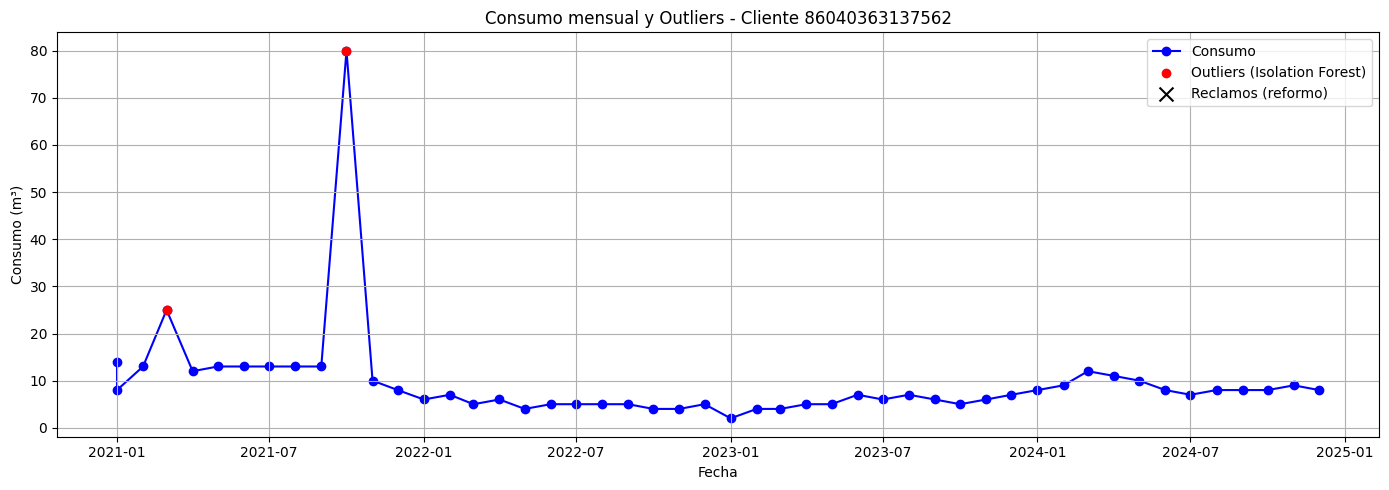

In [ ]:
graficar_outliers_isolation_forest(df_if, cliente_id=86040363137562)

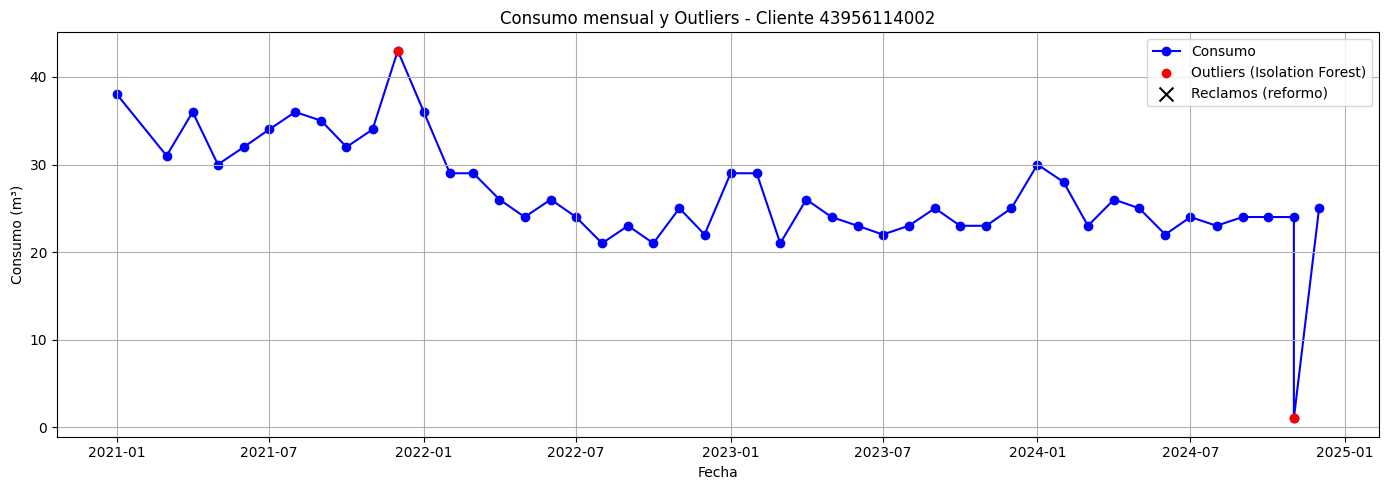

In [ ]:
graficar_outliers_isolation_forest(df_if, cliente_id=43956114002)

In [ ]:
df_media[df_media["reformo"] == 1]["id_fornecimento"].iloc[100]


44834560001.0

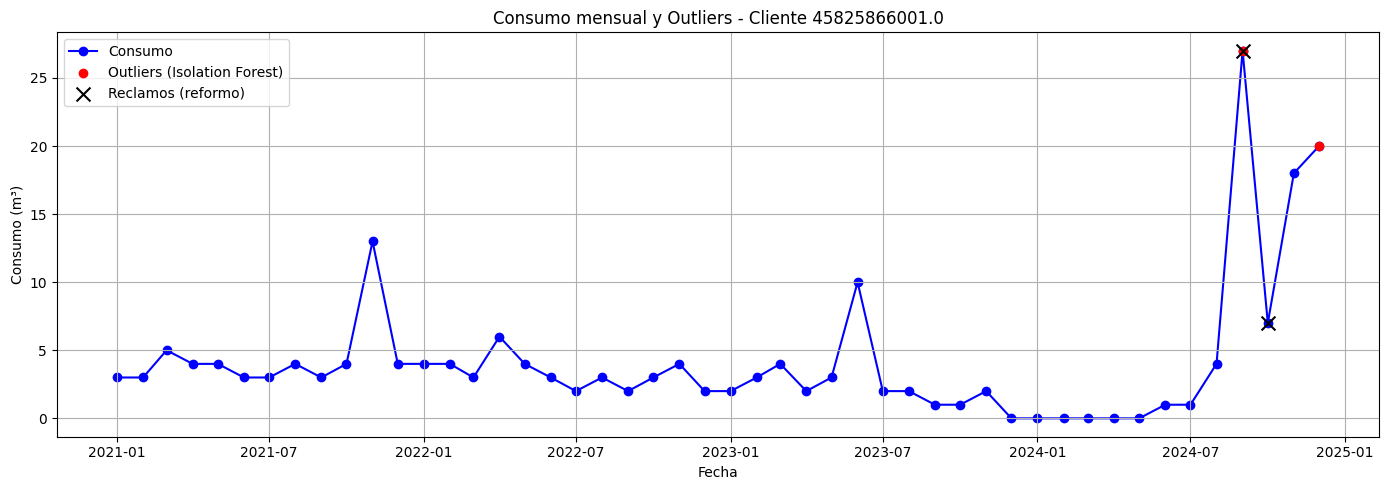

In [ ]:
graficar_outliers_isolation_forest(df_if, cliente_id=45825866001.0)

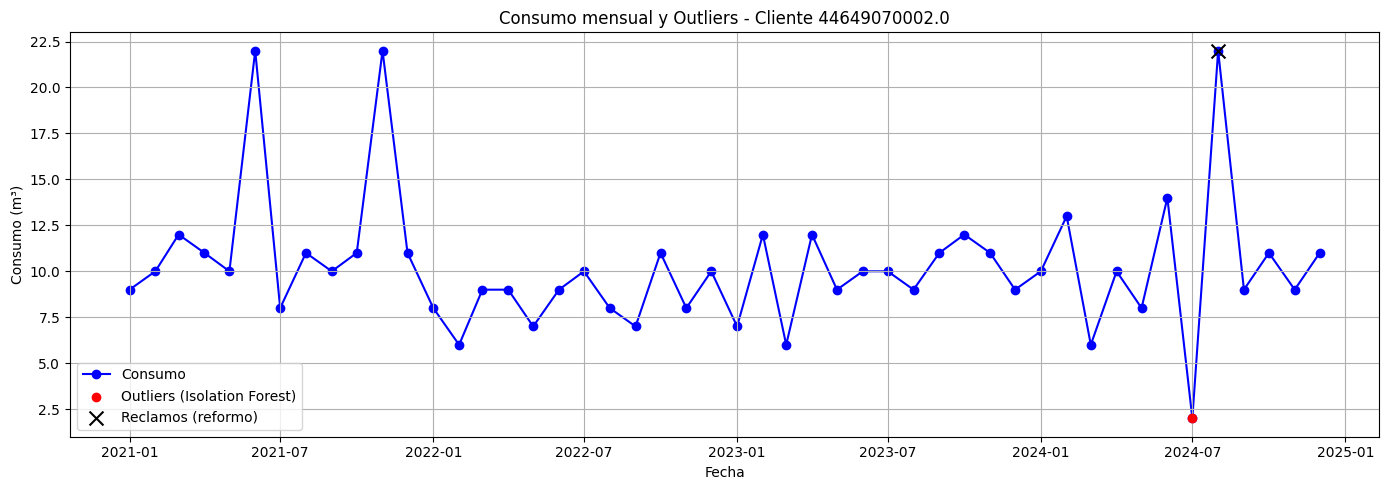

In [ ]:
graficar_outliers_isolation_forest(df_if, cliente_id=44649070002.0)

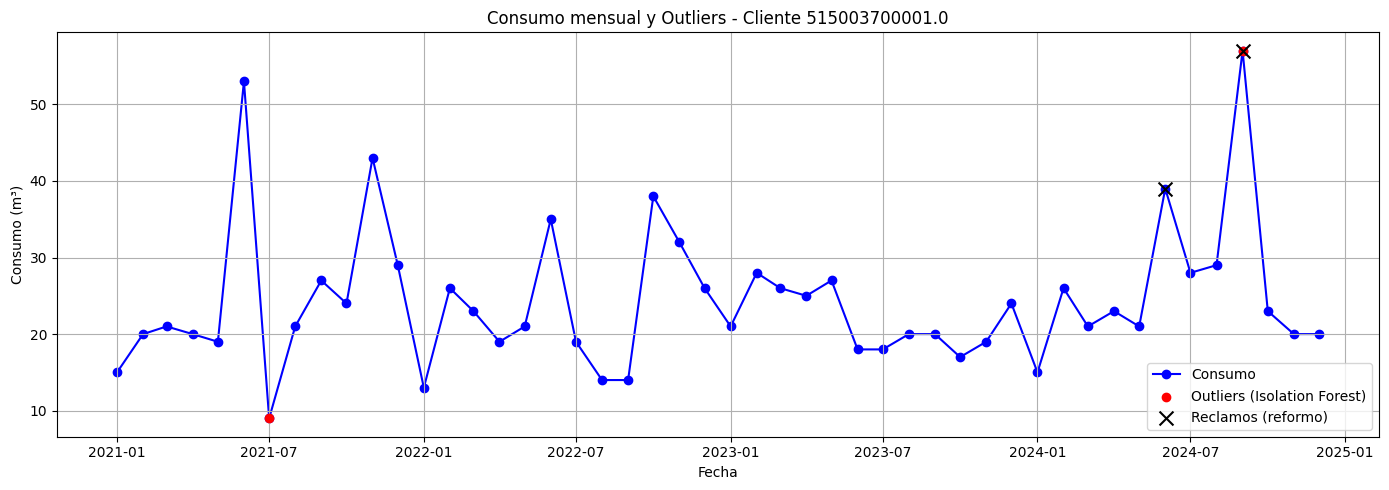

In [ ]:
graficar_outliers_isolation_forest(df_if, cliente_id=515003700001.0)

In [ ]:
evaluar_modelo_outliers(df_if, modelo_id="IF", col_outlier="outlier_if")

modelo_id  Total_Outliers  Total_Reformas  # Reformas que son Outliers  \
0        IF           60857            3809                          748   

   # Reformas que NO son Outliers  # Outliers que son Reformas  \
0                            3061                          748   

   # Outliers que NO son Reformas  % Reformas Detectadas  \
0                           60109                     20   

   % Outliers que son Reformas  
0                            1

## LOF

In [ ]:
df_lof = detectar_outliers_lof(df_media, col_consumo="qtd_consumo_medido_agua", n_neighbors=5, contamination=0.05)

/Users/58994/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/Users/58994/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/Users/58994/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/Users/58994/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/Users/58994/.pyenv/versions/3.11.5/lib/python3.11/s

## Evaluacion

In [ ]:
df_lof_eval = evaluar_modelo_outliers(df_lof, modelo_id="LOF", col_outlier="outlier_lof")
df_lof_eval

modelo_id  Total_Outliers  Total_Reformas  # Reformas que son Outliers  \
0       LOF           65905            3809                          331   

   # Reformas que NO son Outliers  # Outliers que son Reformas  \
0                            3478                          331   

   # Outliers que NO son Reformas  % Reformas Detectadas  \
0                           65574                      9   

   % Outliers que son Reformas  
0                            0

In [ ]:
# Evaluar Media Móvel
df_mm_eval = evaluar_modelo_outliers(
    df_resultado,
    modelo_id="MM",
    col_outlier="outlier_MM",
    col_reforma="reformo",
    col_residuo="residuo_mm"
)

# Evaluar Isolation Forest
df_if_eval = evaluar_modelo_outliers(
    df_if,
    modelo_id="IF",
    col_outlier="outlier_if",
    col_reforma="reformo"
)

# Evaluar Local Outlier Factor
df_lof_eval = evaluar_modelo_outliers(
    df_lof,
    modelo_id="LOF",
    col_outlier="outlier_lof",
    col_reforma="reformo"
)

# Unir los resultados
df_metricas_comparativas = pd.concat([df_mm_eval, df_if_eval, df_lof_eval], ignore_index=True)

# Mostrar la tabla
display(df_metricas_comparativas)

modelo_id  Clientes_Procesados  Total_Outliers  Reformas_Total  \
0        MM                44419          201986            2154   
1        IF                44419           60857            3809   
2       LOF                44419           65905            3809   

   Reformas_Outliers  Reformas_No_Outliers  %_Reformas_Outliers  \
0               1191                   963                   55   
1                748                  3061                   20   
2                331                  3478                    9   

   %_Reformas_No_Outliers  Outliers_Reformas  Outliers_No_Reformas  \
0                      45               1191                200795   
1                      80                748                 60109   
2                      91                331                 65574   

   %_Outliers_Reformas  %_Outliers_No_Reformas  Outliers_Positivos  \
0                    1                      99              117492   
1                    1                      99               41100   
2                    0                     100               34098   

   Outliers_Negativos  
0               84484  
1               19756  
2               31746